# Tick-bite Classifier (ResNet34)

This model was leveraged from fastai's "Creating your own dataset from Google Images" notebook for Lesson 2 in version 3 of the fastai course. 

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for tick bites, mosquito bites, and once for healthy skin).

In [1]:
!pip uninstall torch torchvision -y 
!pip install torch==1.4.0 torchvision==0.5.0 

Uninstalling torch-1.6.0+cu101:
  Successfully uninstalled torch-1.6.0+cu101
Uninstalling torchvision-0.7.0+cu101:
  Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 39.0MB/s 


In [2]:
from fastai.vision import *

In [ ]:
#from fastai.imports import *

## Get a list of URLs

### Search and scroll

To aggregate the data, [Google Images](http://images.google.com) was used as the data source. For the initial search, simple phrases like "tick bite", "mosquito bite", and "healthy skin" were used in English. 

Noticing that the image results from the aforementioned search queries resulted in mainly images with white or fair skin, adding in search results from other geographies was considered. Six additional languages (for search queries) were chosen: Spanish, French, German, Mandarin, Portguese, and Russian. The selection criteria for these languages was chosen by verifying what countries had prolific cases of tick-borne illnesses, specifically Lyme Disease [SOURCE]. However there are some edge case countries like India and Israel that verfied [SOURCE Scientific Medical journals] the presence of Lyme Disease within their respective geographies. As a result, Hebrew and Hindi search queries will be conducted in the next phase of research for image data aggregation. 

It is a good idea to put things you want to exclude into the search query, for instance the ideal search query for the model is looking for tick bites (also known as 'erythema migrans') on humans, "tick bite human", would be the best query along with eliminating possible items that populate the results like dogs, inforgraphics, or animations. The image type filter, for this case photos, would be the best choice to reduce non-photo type images.

    "tick bite human" -dog -insect -infographic -justin bieber
    "tick bite erythema migrans" -dog -insect -justin bieber

    "mosquito bite" -insect -animation

    "healthy skin" -advertisement
    "healthy skin leg" -advertisement
    "healthy skin arm" -advertisement



### Download into file

Leveraging the fastai notebook from lesson 2, the Javascript code below must be run in your browser which will save the URLs of all the images needed for the dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Disable all blockers in Chrome before running. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

## Mount Google Drive to Notebook

In [3]:
#Skip this step if you're not using Google CoLab

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels. 

Note: The csv files of the search queries ("tick bite", "mosquite bite", and "healthy skin") in the 6 additional languages are commented out and listed below. 

In [4]:
folder = 'tick'
file = 'eng_tick_bite.csv'

# file = 'esp_picadura_de_g_lyme.csv'
# file = 'fren_morsure_de_tique.csv'
# file = 'germ_zeckenbiss.csv'
# file = 'mand_pi_yao.csv'
# file = 'port_mordida_carrapato.csv'
# file = 'russ_ukus_kleshcha.csv'


In [9]:
folder = 'mosquito'
file = 'eng_mosquito_bite.csv'

# file = 'esp_picadura_de_mosquito.csv'
# file = 'fren_piqure_de_moustique.csv'
# file = 'germ_mueckenstich.csv'
# file = 'mand_wenchong_dingyao.csv'
# file = 'port_picada _de_mosquito.csv'
# file = 'russ_komarinyy_ukus.csv'


In [12]:
folder = 'healthy'
file = 'eng_healthy_skin.csv'

# file = 'esp_piel_saludable.csv'
# file = 'fren_peau_saine.csv'
# file = 'germ_gesunde_haut.csv'
# file = 'mand_jiankang_de_pifu.csv'
# file = 'port_pele_saudável_corpo.csv'
# file = 'russ_zdorovaya_kozha.csv'

You will need to run this cell once per each category.

In [13]:
# Option to run local - update the Path location (lornythegreat⁩/Documents⁩/⁨code⁩/⁨tick_bite_classifier⁩/images)
# Run in CoLab file path is below:

path = Path('/content/drive/My Drive/lyme_bites/TEST/tickbites')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
path.ls()

[PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/port_picada _de_mosquito.csv'),
 PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/port_pele_saudável_corpo.csv'),
 PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/russ_komarinyy_ukus.csv'),
 PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/russ_zdorovaya_kozha.csv'),
 PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/mand_jiankang_de_pifu.csv'),
 PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/mand_wenchong_dingyao.csv'),
 PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/germ_mueckenstich.csv'),
 PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/germ_gesunde_haut.csv'),
 PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/fren_piqure_de_moustique.csv'),
 PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/fren_peau_saine.csv'),
 PosixPath('/content/drive/My Drive/lyme_bites/TEST/tickbites/esp_piel_saludable.csv'),
 PosixPat

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](https://github.com/fastai/course-v3/blob/master/nbs/dl1/images/download_images/upload.png?raw=1)

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [7]:
classes = ['tick','mosquito','healthy']

In [14]:
# Dowload the images from the csv files, maximum number of 200 images. 

download_images(path/file, dest, max_pics=500)

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

tick


mosquito


healthy


## View data

In [16]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
#If you already cleaned your data, run this cell instead of the one before
#np.random.seed(42)
#data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [17]:
data.classes

['healthy', 'mosquito', 'tick']

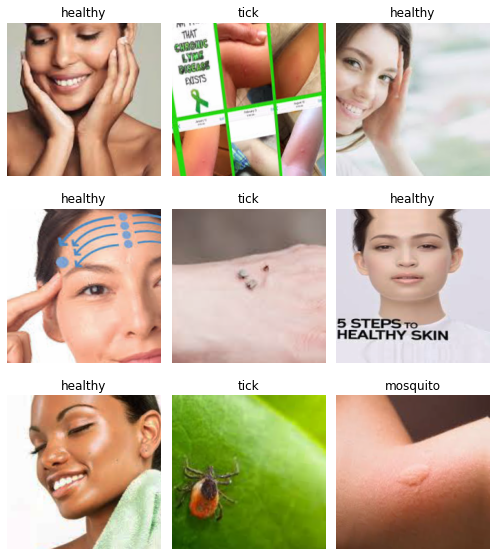

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['healthy', 'mosquito', 'tick'], 3, 768, 192)

## Train model

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.372188,0.828822,0.723958,00:11
1,1.011233,0.737949,0.765625,00:11
2,0.816496,0.761011,0.802083,00:11
3,0.726636,0.737338,0.796875,00:11


In [22]:
learn.save('stage-1')

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


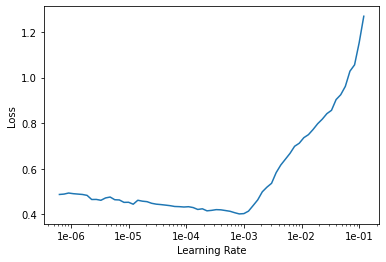

In [25]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.459614,0.662055,0.765625,00:11
1,0.400625,0.702235,0.791667,00:11


In [27]:
learn.save('stage-2')

## Interpretation

In [28]:
learn.load('stage-2');

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

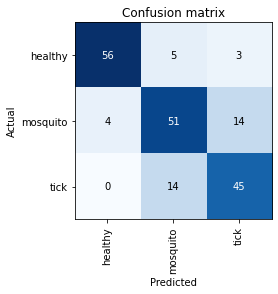

In [30]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [ ]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [ ]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [ ]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [ ]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

'No images to show :)'


If the code above does not show any GUI(contains images and buttons) rendered by widgets but only text output, that may caused by the configuration problem of ipywidgets. Try the solution in this [link](https://github.com/fastai/fastai/issues/1539#issuecomment-505999861) to solve it.


Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [ ]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [ ]:
defaults.device = torch.device('cpu')

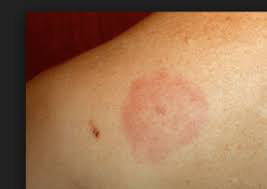

In [ ]:
img = open_image(path/'tick/00000072.jpg')
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'tick'